## **PARCIAL 2.**

### ***Física Computacional I.***

### José Luis Builes Canchala. C.C. 1035442832.

$$\$$

### **Punto 1: Dados.**

Lanzar ambos dados a la vez o uno después del otro son casos banales; i.e., ambos son iguales. Esto en tanto ambos eventos son independientes entre sí; el único cambio posible es que un dado golpee al otro al ser lanzados a la vez, pero esto sería al azar. Al fin y al cabo, ambos son el mismo evento por la independencia.

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

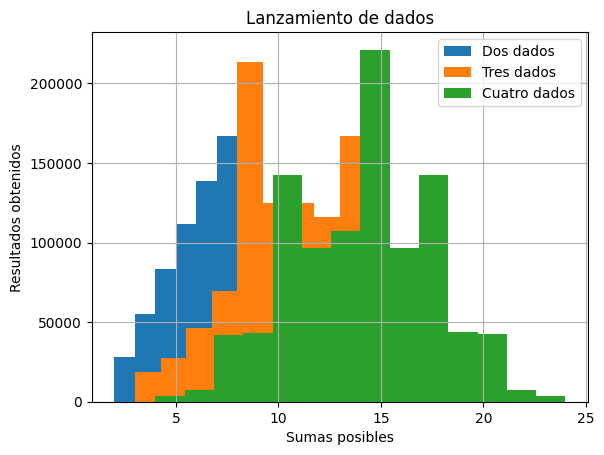

In [2]:
ld1, ld2, ld3, ld4 = [], [], [], []

for n in range(int(1e6)):
  d1 = np.random.randint(1,7)
  d2 = np.random.randint(1,7)
  d3 = np.random.randint(1,7)
  d4 = np.random.randint(1,7)
  ld1.append(d1)
  ld2.append(d2)
  ld3.append(d3)
  ld4.append(d4)

s2, s3, s4 = [], [], []
for i in range(len(ld1)):
  sp4 = ld1[i] + ld2[i] + ld3[i] + ld4[i]
  sp3 = ld1[i] + ld2[i] + ld3[i] 
  sp2 = ld1[i] + ld2[i] 

  s4.append(sp4)
  s3.append(sp3)
  s2.append(sp2)

plt.hist(s2, density=False, bins=10, label="Dos dados")
plt.hist(s3, density=False, bins=12, label="Tres dados")
plt.hist(s4, density=False, bins=14, label="Cuatro dados")
plt.title('Lanzamiento de dados') 
plt.xlabel("Sumas posibles")
plt.ylabel('Resultados obtenidos')
plt.grid()
plt.legend()
plt.show()

### **Punto 2: LHC circular.**

Text(0.5, 0, 'Número de experimentos')

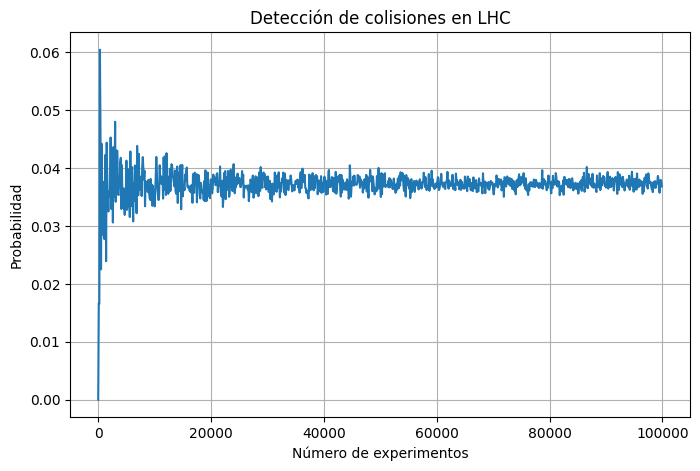

In [3]:
R = 100 # Radio del colisionador; numero mayor a cero.
r = 1 # Radio de la partícula.
RD = 10 # Radio del detector.
n = 100 # Número de tiros.
x1, y1 = np.random.uniform(-R, R, [2, n]) # Cara A.
x2, y2 = np.random.uniform(-R, R, [2, n]) # Cara B.

lista = [] # Guarda posiciones.

array = np.arange(10, 100000, 100)

for i in array:
    x1, y1 = np.random.uniform(-R, R, [2, i]) # Cara A.
    x2, y2 = np.random.uniform(-R, R, [2, i]) # Cara B.

    exp_v = ((x1**2 + y1**2) < (R - r)**2) & ((x2**2 + y2**2) < (R - r)**2)
    colisiones = np.vectorize(lambda x1,y1,x2,y2: True if math.dist([x1,y1], [x2,y2]) <= 2*RD else False) \
        (x1[exp_v],y1[exp_v],x2[exp_v],y2[exp_v])

    probabilidad_de_col = colisiones.sum()/exp_v.sum()
    lista.append(probabilidad_de_col)

plt.figure(figsize=[8,5])
plt.plot(array,lista)
plt.grid()
plt.title('Detección de colisiones en LHC')
plt.ylabel('Probabilidad')
plt.xlabel('Número de experimentos')

Dado que el LHC modelado para el caso "lineal" sigue el planteamiento de las partículas sobre un círculo, entonces el ejercicio no cambia radicalmente, fuera del hecho de añadir el radio del detector, que se impondría como nueva condición límite de detección.

### **Punto 3: Suavización.**

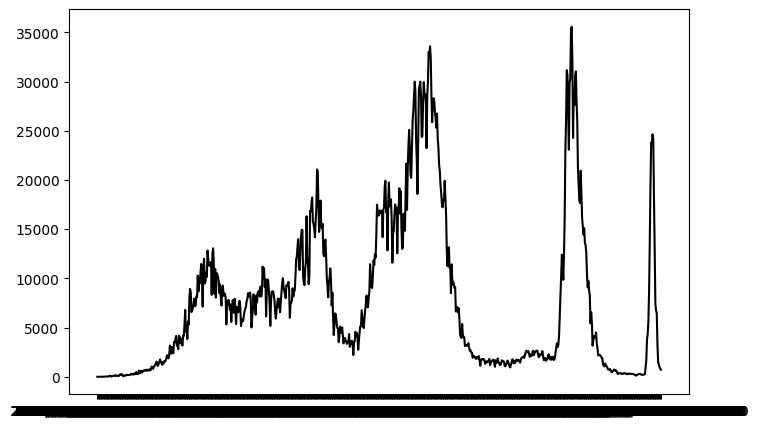

In [4]:
# Datos del covid.

dfcovid = pd.read_csv('Colombia_COVID19_Coronavirus_casos_diarios.csv', index_col=False)

plt.figure(figsize=[8,5])
plt.plot(dfcovid['FECHA_ACTUALIZACION'], dfcovid['NUEVOS_CASOS'], color='k')

In [5]:
# Se hace una copia del df original por si algo. Ocupa memoria, por lo que si se lanza se debe evitar esto.
df_max_scales = dfcovid.copy()

# Normalizando.
df_max_scales['norm_new_cases']  = df_max_scales['NUEVOS_CASOS']/df_max_scales['NUEVOS_CASOS'].abs().max()


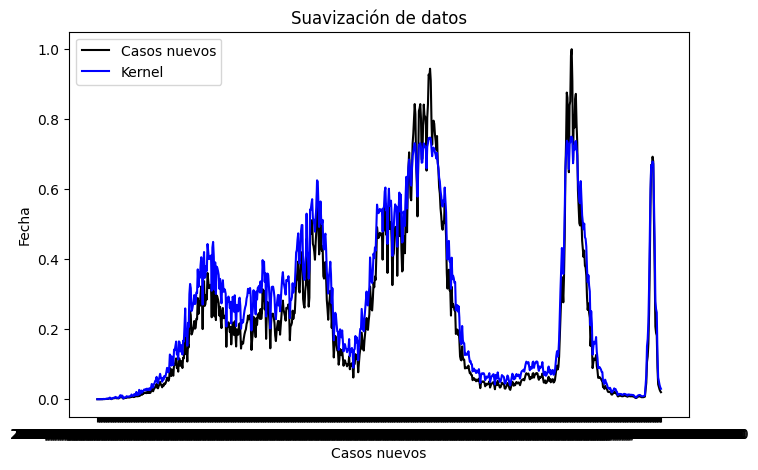

In [9]:
# Aplicando el kernel Epanechnikov.

def kernEpanechnikov(xn, xm):
    h = 1
    l = []
    xma = np.arange(len(xm))
    for i in range (0, len(xn), 1):
        s = 0
        if abs((xn[i] - 1)/h) <= 1:
            k = (3/4)*(1 - (((xn[i] - 1)/h)**2))
        else:
            k = 0
        l.append(k)
    return l

df_max_scales['gaussian_smoothed_v2'] = kernEpanechnikov(df_max_scales['norm_new_cases'], df_max_scales['FECHA_ACTUALIZACION'])

plt.figure(figsize=[8,5])
plt.xlabel('Casos nuevos')
plt.ylabel('Fecha')
plt.title('Suavización de datos')
plt.plot(df_max_scales['FECHA_ACTUALIZACION'], df_max_scales['norm_new_cases'], color='k', label='Casos nuevos')
plt.plot(df_max_scales['FECHA_ACTUALIZACION'], df_max_scales['gaussian_smoothed_v2'], color='blue', label='Kernel')
plt.legend()